In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
x , y = make_moons(100 , noise = 0.25 , random_state=2)

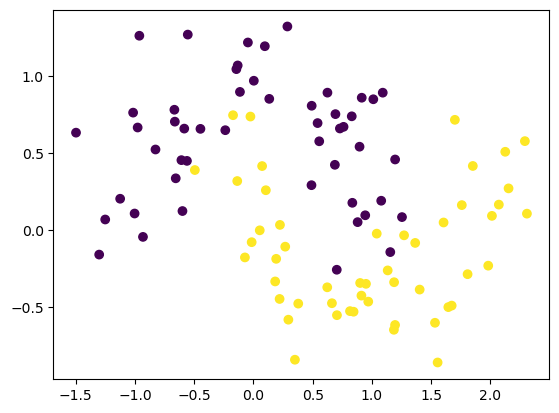

In [8]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [11]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(128,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(x,y, validation_split=0.2,epochs=700)

Epoch 1/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6211 - loss: 0.6325 - val_accuracy: 0.9000 - val_loss: 0.3691
Epoch 2/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8172 - loss: 0.4119 - val_accuracy: 0.9000 - val_loss: 0.2124
Epoch 3/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8625 - loss: 0.3793 - val_accuracy: 0.9000 - val_loss: 0.2304
Epoch 4/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8625 - loss: 0.3723 - val_accuracy: 0.9000 - val_loss: 0.2563
Epoch 5/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8508 - loss: 0.3661 - val_accuracy: 0.9000 - val_loss: 0.2299
Epoch 6/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8461 - loss: 0.3313 - val_accuracy: 0.9000 - val_loss: 0.2255
Epoch 7/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8273 - loss: 0.3459 - val_accuracy: 0.9000 - val_loss: 0.2523
Epoch 8/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8195 - loss: 0.3642 - val_accuracy: 0.9000 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 944us/step


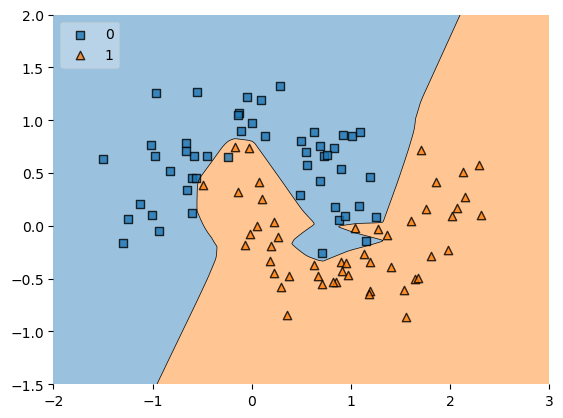

In [15]:
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

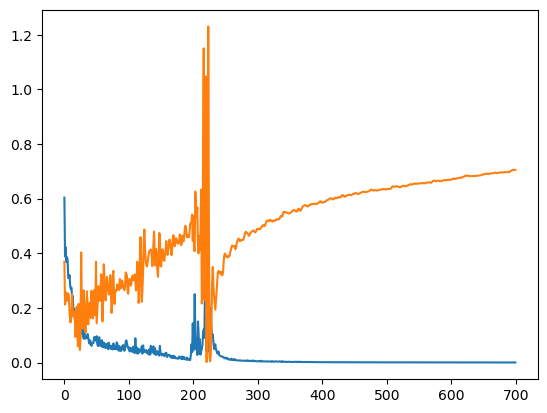

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Regularization

In [28]:
model1 = Sequential()
model1.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dense(1,activation='sigmoid',))
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
adam = Adam(learning_rate = 0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history1 = model1.fit(x, y, epochs=700, validation_split = 0.2)

Epoch 1/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8609 - loss: 0.3528 - val_accuracy: 1.0000 - val_loss: 0.1399
Epoch 2/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9039 - loss: 0.3857 - val_accuracy: 0.9500 - val_loss: 0.1839
Epoch 3/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9070 - loss: 0.2771 - val_accuracy: 0.8500 - val_loss: 0.3755
Epoch 4/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9336 - loss: 0.2276 - val_accuracy: 1.0000 - val_loss: 0.1307
Epoch 5/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9469 - loss: 0.2690 - val_accuracy: 1.0000 - val_loss: 0.1365
Epoch 6/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9195 - loss: 0.2404 - val_accuracy: 0.9500 - val_loss: 0.2908
Epoch 7/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9078 - loss: 0.3007 - val_accuracy: 0.9500 - val_loss: 0.2166
Epoch 8/700
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9414 - loss: 0.2152 - val_accuracy: 0.9500 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 837us/step


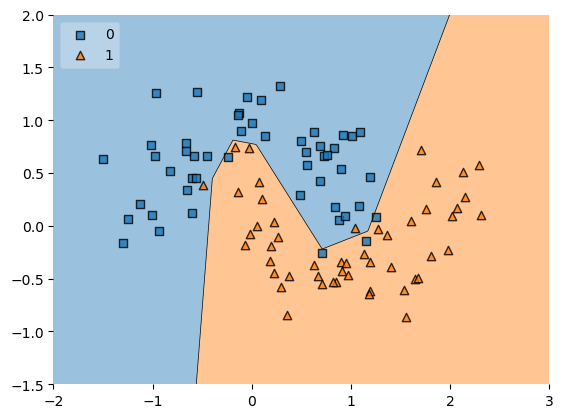

In [31]:
plot_decision_regions(x,y.astype(int),clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

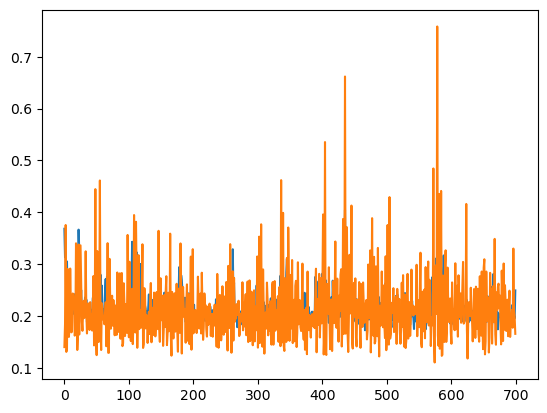

In [32]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [33]:
model_weight_layer = model.get_weights()[0].reshape(256)
model1_weight_layer1 = model1.get_weights()[0].reshape(256)

<Axes: >

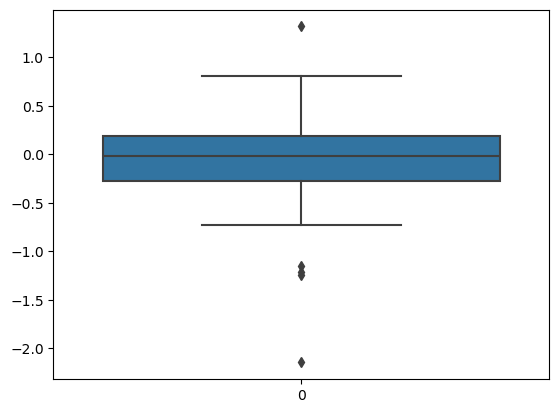

In [34]:
sns.boxplot(model_weight_layer)

<Axes: >

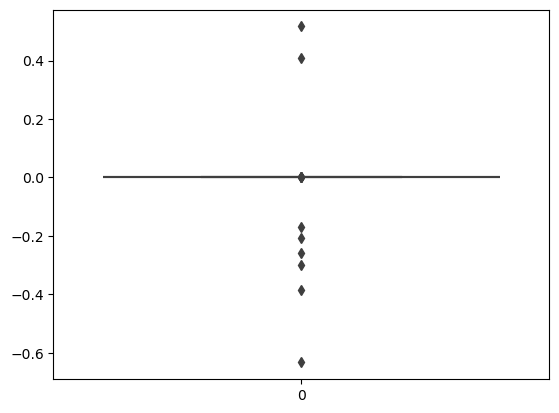

In [35]:
sns.boxplot(model1_weight_layer1)

In [36]:
model1_weight_layer1.min()

-0.6327995

In [37]:
model1_weight_layer1.max()

0.516507

In [38]:
model_weight_layer.min()

-2.144771

In [39]:
model_weight_layer.max()

1.3173101

/tmp/ipykernel_420569/2768615689.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer)
/home/ashu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_420569/2768615689.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for

<Axes: ylabel='Density'>

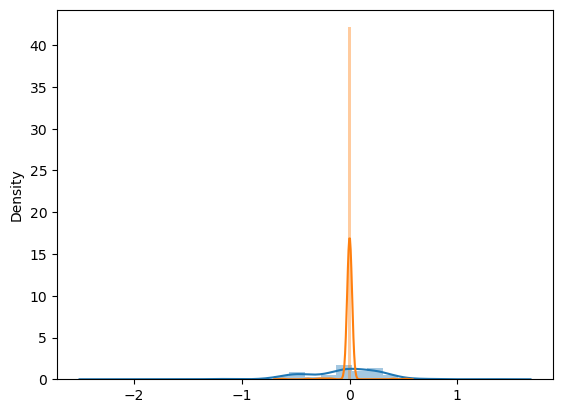

In [41]:
sns.distplot(model_weight_layer)
sns.distplot(model1_weight_layer1)